# IMPORTING NECESSARY PACKAGES

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors


from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from umap import UMAP


import warnings
warnings.filterwarnings('ignore')

# **ETL** / **ELT**



In [2]:
file_path= 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv'
df = pd.read_csv(file_path)
df.head(5)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


## **DATA DESCRIPTION :**
1. Unnamed 0: The index of the dataset.
2. Email_hash: An anonymized identifier representing the email of the learner.
3. Company_hash: An anonymized identifier indicating the current employer of the
learner.
4. orgyear: Represents the year the learner began employment at the current
company.
5. CTC: Current Compensation to the Company (CTC) of the learner.
6. Job_position: Represents the job profile or role of the learner within their
company.
7. CTC_updated_year: The year in which the learner's CTC was most recently
updated. This could be due to yearly increments, promotions, or other factors.





### **Dataset Observation**

* Raw dataset contains 205843 rows and 7 columns
* Among which 2 columns named *ctc* and *unnamed:0* have int datatype, columns named *orgyear* and *ctc_updated_year* are of float dtype and rest are object dtypes named  *company_hash,email_hash and job_position*

In [4]:
# Remove unnecessary column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [6]:
df.nunique()

,0
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


### **Columns Details** :

1. *company_hash*:learners belonging to 37,299 different companies.
2. *email_hash*: 153,443 unique emails, suggesting that most rows correspond to unique individuals with repeated learners data too.
3. *orgyear and ctc_updated_year* Orgyear shows wide variation (77 years), while ctc_updated_year (7 years) seems inconsistent.
4. *ctc* : 3,360 unique values, suggests a diverse range of salaries.
5. *job_position*: 1,016 unique roles, showing a wide variety of job titles.

In [7]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [8]:
df.describe(include='number').round(0).astype(int)

,orgyear,ctc,ctc_updated_year
count,205757,205843,205843
mean,2015,2271685,2020
std,64,11800914,1
min,0,2,2015
25%,2013,530000,2019
50%,2016,950000,2020
75%,2018,1700000,2021
max,20165,1000150000,2021


In [9]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


## **Transformation**

In [10]:

# Shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 205843 rows and 6 columns.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


### Fixing datatypes

In [12]:
df['ctc_updated_year']=df['ctc_updated_year'].astype(int)

In [18]:
# Converting orgyear and ctc_updated_year columns to datetime year format
df['orgyear'] = pd.to_datetime(df['orgyear'], format='%Y', errors='coerce').dt.year
df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year'], format='%Y', errors='coerce').dt.year

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205809 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205765 non-null  object 
 1   email_hash        205809 non-null  object 
 2   orgyear           205678 non-null  float64
 3   ctc               205809 non-null  int64  
 4   job_position      153261 non-null  object 
 5   ctc_updated_year  205809 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 10.2+ MB


### Checking Duplicates

In [14]:
# Value counts of categorical columns
for col in df.columns:
    unique_values = df[col].nunique()
    print(f'Unique values in {col}: {unique_values}\n')
    if unique_values < 10:
        print(f'Value counts for {col}:\n{df[col].value_counts()}\n')
    print(f'Percentage of unique values in {col}: {unique_values/df.shape[0]*100:.2f}%\n')
    print("" + "-"*50 + "\n")

Unique values in company_hash: 37299

Percentage of unique values in company_hash: 18.12%

--------------------------------------------------

Unique values in email_hash: 153443

Percentage of unique values in email_hash: 74.54%

--------------------------------------------------

Unique values in orgyear: 77

Percentage of unique values in orgyear: 0.04%

--------------------------------------------------

Unique values in ctc: 3360

Percentage of unique values in ctc: 1.63%

--------------------------------------------------

Unique values in job_position: 1016

Percentage of unique values in job_position: 0.49%

--------------------------------------------------

Unique values in ctc_updated_year: 7

Value counts for ctc_updated_year:
ctc_updated_year
2019    68688
2021    64976
2020    49444
2017     7561
2018     6746
2016     5501
2015     2927
Name: count, dtype: int64

Percentage of unique values in ctc_updated_year: 0.00%

--------------------------------------------------



In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'The dataset has {duplicates} duplicate rows.')

The dataset has 34 duplicate rows.


In [16]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019
110833,zgn vuurxwvmrt vwwghzn,8aad76cb5766c6b24c8eebfeb891cb548420690d0030a0...,2019.0,500000,NaN,2021
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020


In [17]:
df.drop_duplicates(inplace=True)
print(f'After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

After removing duplicates, the dataset has 205809 rows and 6 columns.


### Checking Missing Values

In [20]:
df.isna().sum()

,0
company_hash,44
email_hash,0
orgyear,131
ctc,0
job_position,52548
ctc_updated_year,0


In [21]:
# Percentage of missing values in dataset
(df.isnull().mean()*100).loc[lambda x: x > 0].sort_values(ascending=False)

,0
job_position,25.532411
orgyear,0.063651
company_hash,0.021379


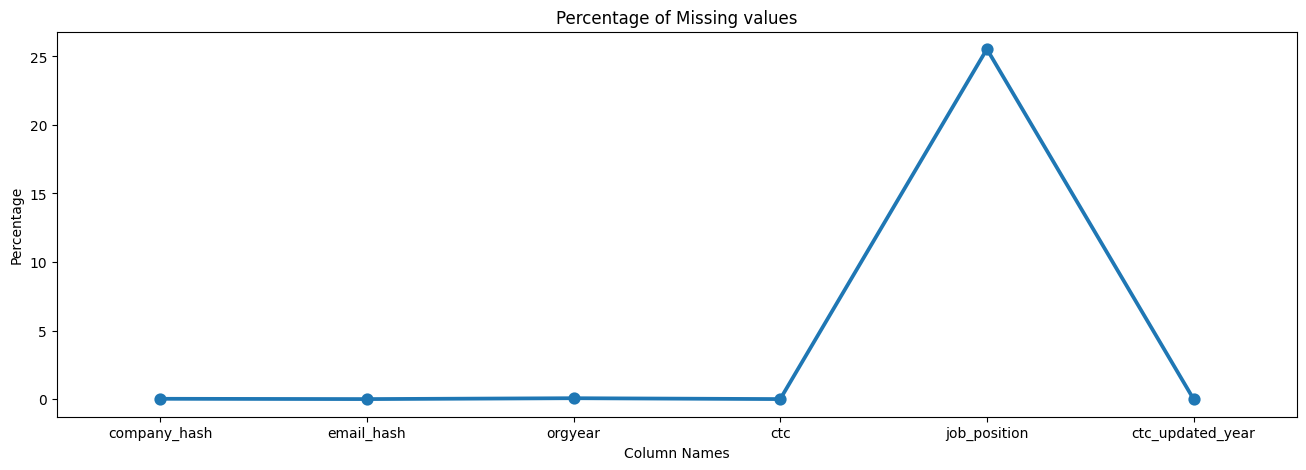

In [22]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)          # column name=0
plt.xticks(fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.xlabel("Column Names")
plt.show()

In [23]:
df.email_hash.value_counts().head(10)

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0,8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8


In [24]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019


In [25]:
df.drop(columns=['job_position']).duplicated().sum()

np.int64(38948)

As we can see if we remove the Job_positions, there will be 38948 duplicate instances. So there is a possibility that a person can work for many roles that are integrated with each other but instead of nesting them, they are shown as different rows. A learner changing job position 10 times in same company and that too in a span of 2 years is illogical.

In [26]:
df['job_position'].value_counts().head(10)

,count
job_position,
Backend Engineer,43546
FullStack Engineer,24711
Other,18071
Frontend Engineer,10417
Engineering Leadership,6870
QA Engineer,6587
Data Scientist,5367
Android Engineer,5356
SDET,4967


In [27]:
df[df['job_position'].str.contains('Software',case=False, na=False)]['job_position'].value_counts()

,count
job_position,
Senior Software Engineer,55
Software Engineer (Backend),42
Software Engineer 2,22
Associate Software Engineer,18
Software Engineer,17
...,...
Software Dev. Engineer,1
Software Engineer Android Intern,1
Software Engineer 3,1


There are different job_positions like SDE1, SDE2, software engineer, senior software engineer, software engineer 2 etc, which can be a single role, so lets integrate them into one. But before that lets try to fill null values in this column using users mode value for job_position.

In [28]:
df['job_position'].isna().sum()

np.int64(52548)

In [29]:
# for job_position column
def fill_with_mode(group):
    mode_job = group['job_position'].mode()
    return group['job_position'].fillna(mode_job[0] if not mode_job.empty else 'Unknown')

df['job_position']=df.groupby('email_hash').apply(fill_with_mode).reset_index(level=0, drop=True)

In [30]:
df['job_position'].isna().sum()

np.int64(0)

# **EDA**

## **Univariate Analysis**

### ***job_position***

This column seems complicated and informative. Lets dwelve deep into it first.

In [31]:
df['job_position'].value_counts()

,count
job_position,
Backend Engineer,53985
FullStack Engineer,31110
Other,22110
Unknown,21155
Frontend Engineer,12775
...,...
Product Development Engineer,1
Software Dev. Engineer,1
Jr. Software Engineer,1


In [32]:
# Cleaning Data
import re

def clear_feat(col_data):
    new_data=re.sub('[^A-Za-z ]+', '', col_data)
    return new_data

In [33]:
df['job_position']=df['job_position'].apply(clear_feat)
df['job_position']=df['job_position'].str.strip().str.lower()
df['job_position']

,job_position
0,other
1,fullstack engineer
2,backend engineer
3,backend engineer
4,fullstack engineer
...,...
205838,unknown
205839,unknown
205840,unknown
205841,unknown


In [34]:
df.duplicated().sum()

np.int64(26821)

In [51]:
df.drop_duplicates(inplace=True)
print(f'After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

After removing duplicates, the dataset has 178988 rows and 6 columns.


In [52]:
df['job_position'].nunique()

856

In [55]:
df['job_position'].value_counts().iloc[:20]

,count
job_position,
backend engineer,45575
fullstack engineer,26812
unknown,21155
other,18562
frontend engineer,10715
engineering leadership,6921
qa engineer,6666
android engineer,5485
data scientist,5472


In [54]:
df_filtered = df[df['job_position'].isin(df['job_position'].value_counts()[lambda x: x >= 2].index)]
df_filtered['job_position'].value_counts()

,count
job_position,
backend engineer,45575
fullstack engineer,26812
unknown,21155
other,18562
frontend engineer,10715
...,...
software developer i,2
software dev engineer,2
embedded software engineer,2


We can see there are only 232 job_positions which have atleast 2 users, remaining roles have 1 learner each, which shows that learners belonging to these roles are negligible or kind of outliers. Lets see if these roles have any other particular features or not.

In [56]:
import plotly.express as px

# Get top 10 job positions
top_jobs = df['job_position'].value_counts().head(10).reset_index()
top_jobs.columns = ['job_position', 'Count']

# Create interactive horizontal bar chart
fig = px.bar(
    top_jobs,
    x='Count',
    y='job_position',
    orientation='h',
    title='Top 10 Job Positions',
    text='Count',
    hover_data={'job_position': True, 'Count': True},
)

# Reverse the Y-axis to match your Matplotlib version
fig.update_yaxes(autorange="reversed")

# Customize layout
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Job Position',
    template='plotly_white',
)

fig.show()


Backend engineers dominate with 45,575 counts, followed by fullstack engineers at 26,818, reflecting industry demand for backend and versatile development skills. A significant "unknown" category (21,155) is there, we need to acknoledge those unknown values as well. Lets just keep it as it is.

In [57]:
#Lets categorize the Job positions :
def categorize_job(title):
    if 'intern' in title or 'trainee' in title:
        return 'Internship'
    elif any(keyword in title for keyword in['owner','ceo','founder','entrepreneur','cto']):
        return 'Top Officials'
    elif 'analyst' in title or 'analytics' in title:
        return 'Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif any(keyword in title for keyword in ['research','rd ',' rd','scientist']):
        return 'Research'
    elif 'data' in title and 'engineer' in title:
        return 'Data Engineer'
    elif any(keyword in title for keyword in ['facilitator','teacher','teaching','lecturer','pgt','professor','faculty']):
        return 'Teaching'
    elif any(keyword in title for keyword in ['test','qa','qc','automation']):
        return 'Quality Assurance and Testing'
    elif any(keyword in title for keyword in ['software','sde','developer','programmer']):
        return 'Software'
    elif any(keyword in title for keyword in ['manager','leader','head','director','lead','executive','president']):
        return 'Management'
    elif any(keyword in title for keyword in ['mobile','ios','flutter','android']):
        return 'Mobile Engineer'
    elif any(keyword in title for keyword in ['machine learning', 'ml', 'm l','aiml','ai']):
        return 'ML Engineer'
    elif any(keyword in title for keyword in['learning','no job','student','fresher', 'graduate', 'not employed','unemployed']):
        return 'Fresher'
    elif 'frontend' in title or 'web' in title:
        return 'Frontend Engineer'
    elif any(keyword in title for keyword in ['backend','application','integration']):
        return 'Backend Engineer'
    elif any(keyword in title for keyword in ['support','technical','escalation','services','release','pop', 'risk investigator','power plant','fibre','highway','room','mechanical']):
        return 'Support & Maintenance Engineer'
    elif any(keyword in title for keyword in['cyber','IT','iaas','cloud','techops','server','ware','devops','system','performance','radio']):
        return 'IT and Cyber Security'
    elif any(keyword in title for keyword in['product','solution','project','fullstack','implementation','development','platform','design','engineer']):
        return 'Product Development'
    elif any(keyword in title for keyword in['database administrator','oracle dba','linux administrator','network administrator']):
        return 'Database Administration'
    elif any(keyword in title for keyword in ['talent','human','chief people','consul']):
        return 'Human Resources'
    elif any(keyword in title for keyword in ['administrat', 'associate','data','technology']):
        return 'Operations/Administrative Roles'
    elif 'unknown' in title:
        return 'Unknown'
    else:
      return 'Non Technical Roles'

df['job_category'] = df['job_position'].apply(categorize_job)
df['job_category'].value_counts()

,count
job_category,
Backend Engineer,46916
Product Development,28263
Unknown,21155
Non Technical Roles,19329
Frontend Engineer,10721
Management,9189
Mobile Engineer,8262
Quality Assurance and Testing,6708
Software,5719


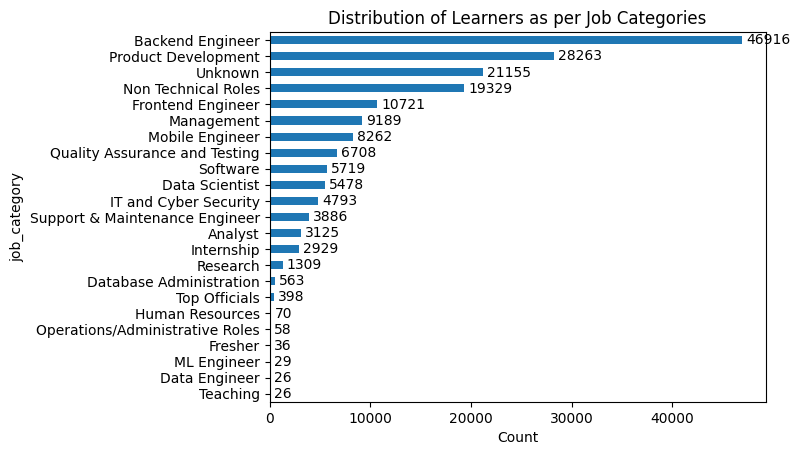

In [61]:
ax = df['job_category'].value_counts().plot(kind='barh')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

# Reverse Y-axis to keep order
ax.invert_yaxis()

plt.title('Distribution of Learners as per Job Categories')
plt.xlabel('Count')
plt.show()

1. **Backend Engineer Leading the Chart**: The "Backend Engineer" category remains the most prominent with **46,916** learners, reflecting its critical role in product architecture.  

2. **Product Development is in High Demand**: "Product Development" emerges as the second-largest category with **28,263** learners, showcasing its importance in creating innovative solutions.

3. **Significant Unknown Data**: The "Unknown" category (**21,155**) indicates a need for improved job role classification or data quality.

4. **Non-Technical Roles are a Necessity.**: With **19,239** learners, non-technical roles form a notable segment, highlighting Scaler's appeal beyond technical domains.

5. **Data Science roles preparing for take off**: The "Data Scientist" category has **5,478** learners, underscoring growing interest in this high-demand field.

6. **Specialized Roles being too less**: Categories like "ML Engineer" (**29**) and "Data Engineer" (**26**) indicate niche interest areas with scope for targeted growth.

In [62]:
# checking roles in non technical category
df[df['job_category']=='Non Technical Roles']['job_position'].value_counts().head(15)

,count
job_position,
other,18562
non coder,601
mts,9
,9
na,5
no,4
full stack devloper,3
ase,3
sales,3


In [63]:
df[df.drop(['job_position'],axis=1).duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,job_category
4718,bxwqgogen,dceb289be0e23a77c5a02d193997abc3109e8805101777...,2011.0,6900000,backend architect,2019,Backend Engineer
5110,avzopt xn,3d6fb1d08f0e6129d97089626f33ca3747a9d495291723...,2005.0,4400000,architect team lead,2021,Management
9854,vwwgrxnt ogenfvqt xzaxv ucn rna,e384a1c1bce518ec3962ed3da2b626a007edf66cce2458...,2011.0,2100000,backend engineer,2020,Backend Engineer
10014,lvjutt xzonxnhnt ge xzegqbvnxgz ntwyzgrgsjzgxav,e83088332191a14dfaa9131eeafb4f596809c34b8520c2...,2018.0,200000,backend architect,2019,Backend Engineer
10397,ovx trtwnqxwvro,7d021961cae2b6eaacce2c09ecaa75320654f8b63ef2c5...,2016.0,860000,product manager,2020,Management
...,...,...,...,...,...,...,...
202157,xmb xzaxv uqxcvnt rxbxnta,ea3b6c66270fb97616a8315fe203314a033da841ab4793...,2016.0,1675000,backend architect,2019,Backend Engineer
202182,gqvwrt,be83bbdb1a0909062489156ed76be3a9ce815274339a81...,2008.0,2000000,backend architect,2019,Backend Engineer
202524,ouqxzsbr,ee5ab46320f580d8b5bf508bb75df74d6cbca13f963cd5...,2011.0,1800000,backend architect,2021,Backend Engineer
203432,ytfrtnn uvwpvqa tzntquqxot,a566e153d1fafc0be8d4a28038fd4616d09a97a32ab0c5...,2016.0,200000,non coder,2021,Non Technical Roles


In [64]:
# Dropping job_position after binning
df_new=df.copy()
df_new.drop(columns=['job_position'],inplace=True)

In [65]:
# dropping duplicates
df_new.drop_duplicates(inplace=True)
print('Shape of Dataset before Dropping Duplicates',df.shape)
print('Shape of Dataset after Dropping Duplicates',df_new.shape)

Shape of Dataset before Dropping Duplicates (178988, 7)
Shape of Dataset after Dropping Duplicates (178582, 6)


### ***company_hash***

In [ ]:
df_new['company_hash'].value_counts().head(10)

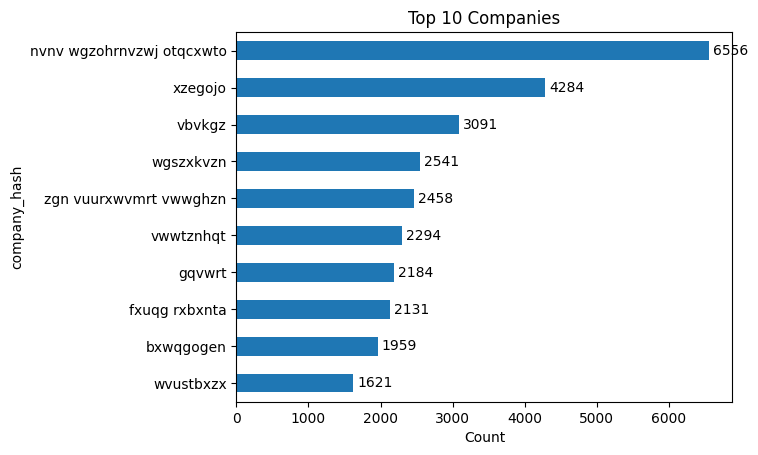

In [67]:
ax =df_new['company_hash'].value_counts().head(10).plot(kind='barh')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

ax.invert_yaxis()

plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.show()

1. **Top Company Leads by a Large Margin**: The company with the hash `nvnv wgzohrnvzwj otqcxwto` has the highest number of learners (**6,556**), indicating it may have a significant workforce interested in upskilling.

2. **Second and Third Companies**: `xzegojo` (**4,284**) and `vbvkgz` (**3,091**) follow, with learner counts significantly lower than the top company, showing a steep drop in representation.

3. **Diversity**: The remaining companies in the top 10 have learner counts ranging from **2,541** to **1,621**, indicating a relatively more even distribution among mid-tier companies.

4. **Future Prospects**: These companies might represent sectors or industries with higher demand for skills offered by Scaler, potentially in technology or software development.

### ***email_hash***

In [68]:
df_new.email_hash.value_counts().head(10)

,count
email_hash,
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,8
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be,7
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b,7


In [69]:
df_new[df_new.email_hash=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_category
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020,Product Development
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020,Support & Maintenance Engineer
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020,Non Technical Roles
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,2020,Analyst
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019,Non Technical Roles
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019,Support & Maintenance Engineer
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019,Product Development
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,2019,IT and Cyber Security


### ***ctc_updated_year***

In [70]:
df_new['ctc_updated_year'].value_counts()

,count
ctc_updated_year,
2019,64351
2021,47093
2020,44619
2017,7461
2018,6727
2016,5438
2015,2893


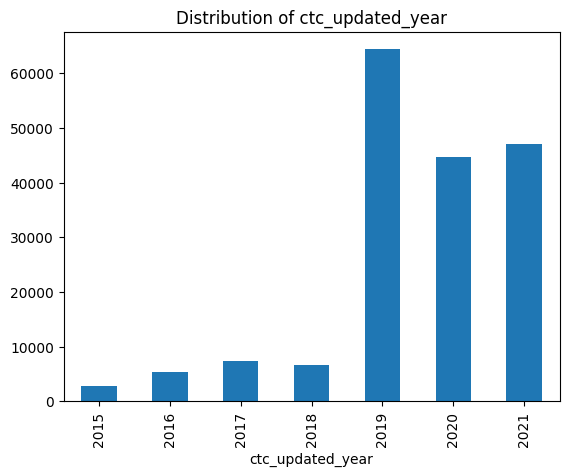

In [74]:
df_new['ctc_updated_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of ctc_updated_year')
plt.ylabel('')
plt.show()

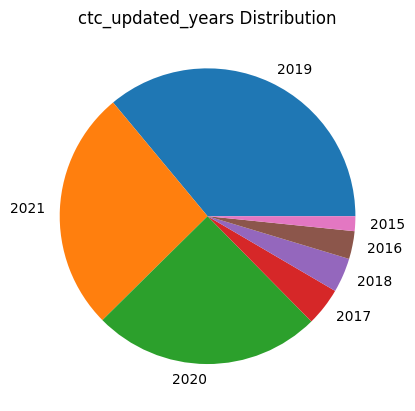

In [73]:
df_new['ctc_updated_year'].value_counts(normalize=True).plot(kind='pie')
plt.title('ctc_updated_years Distribution')
plt.ylabel('')
plt.show()

1. **Data Dominance**: The majority of the entries are from recent years, with **2019** having the highest count at **64,351**, followed by **2021** (**47,093**) and **2020** (**44,619**). This suggests increased activity or better data recording in these years.  

2. **Steady Decline in Early Years**: Data decreases significantly in earlier years, with **2017** (7,461) and prior years having notably lower counts.  

3. **Low Representation for Early Years**: Years like **2015** and **2016** have minimal representation, indicating either fewer learners or incomplete historical data.  

4. **Recent Trends**: The data skew toward recent years can guide analysis to focus on the latest trends in CTC updates for actionable insights.  

5. **Outliers**: The distribution suggests the need to ensure data from earlier years is complete and consistent for meaningful comparisons over time.

### ***orgyear***



In [75]:
df_new['orgyear'].value_counts()

,count
orgyear,
2018.0,21572
2016.0,20169
2017.0,20014
2019.0,19144
2015.0,18184
...,...
1976.0,1
1977.0,1
1979.0,1


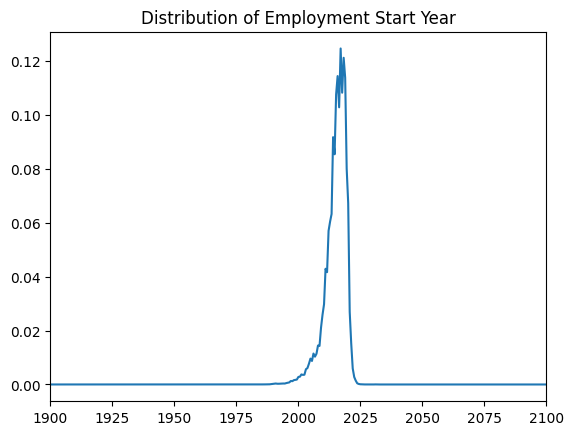

In [76]:
df_new['orgyear'].plot(kind='kde')
plt.xlim(1900,2100)
plt.title('Distribution of Employment Start Year')
plt.ylabel('')
plt.show()

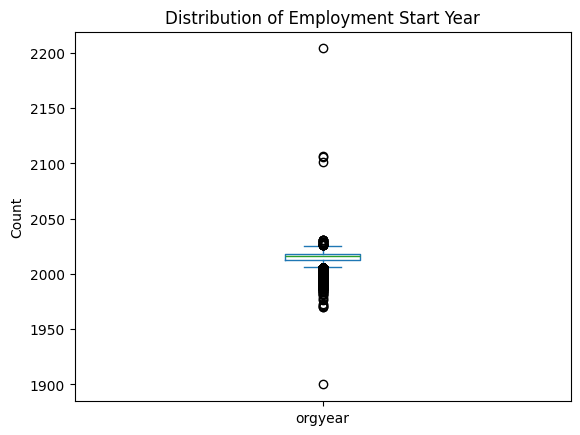

In [77]:
df_new['orgyear'].plot(kind='box')
plt.title('Distribution of Employment Start Year')
plt.ylabel('Count')
plt.show()

In [78]:
df_new['joining_year']=df_new['orgyear']
df_new.loc[(df_new['joining_year']>2021) |(df_new['joining_year']<1995),'joining_year']=np.nan

In [79]:
df_new.joining_year.isna().sum()

np.int64(1599)

In [80]:
min_org_year=df_new.groupby('email_hash')['joining_year'].transform('min')
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,128
ctc,0
ctc_updated_year,0
job_category,0
joining_year,1529


In [81]:
min_org_year=df_new['joining_year'].mean()
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,128
ctc,0
ctc_updated_year,0
job_category,0
joining_year,0


In [82]:
df_new.drop('orgyear',axis=1,inplace=True)

In [83]:
df_new['joining_year']=df_new['joining_year'].astype(int)
df_new['joining_year'].value_counts()

,count
joining_year,
2018,21584
2016,20178
2017,20022
2015,19714
2019,19160
2014,14891
2013,11077
2020,11059
2012,9398


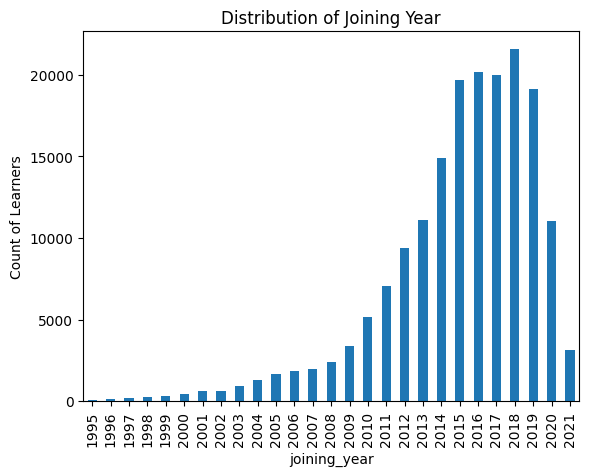

In [84]:
df_new['joining_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

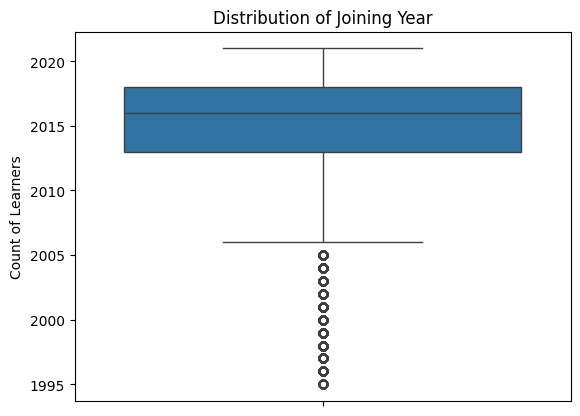

In [85]:
sns.boxplot(df_new['joining_year'])
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

### ***ctc***

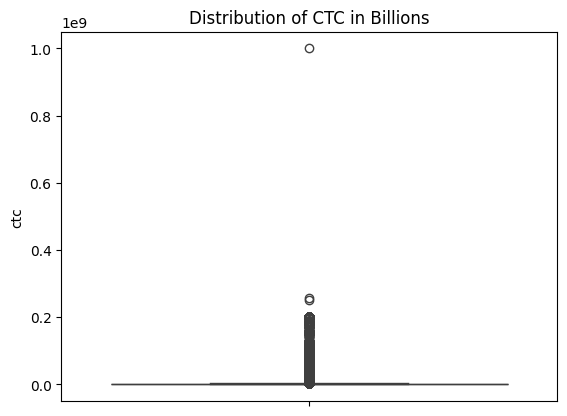

In [86]:
sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC in Billions')
plt.show()

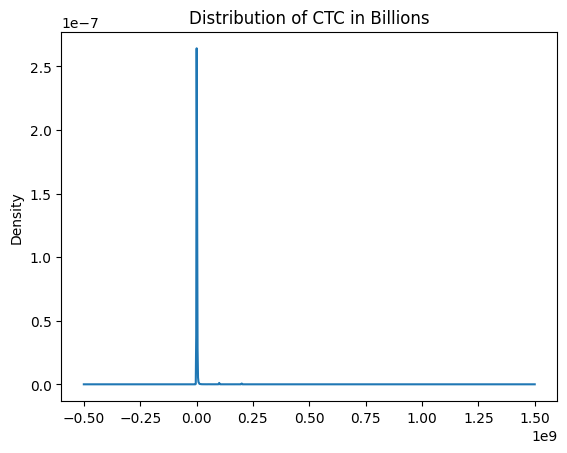

In [87]:
df_new['ctc'].plot(kind='kde')
plt.title('Distribution of CTC in Billions')
plt.show()

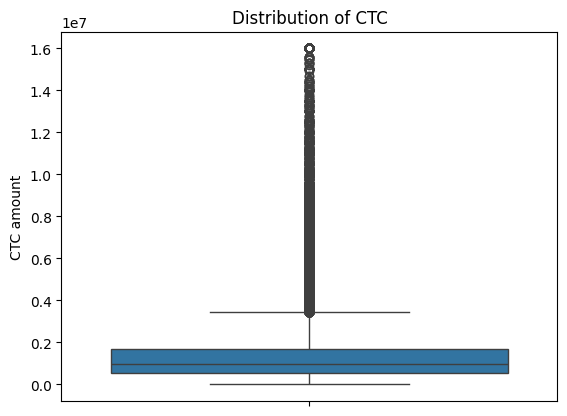

In [88]:
df_new['ctc']=np.clip(df_new['ctc'],0,np.quantile(df_new['ctc'],0.99))

sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC')
plt.ylabel('CTC amount')
plt.show()

## Validating the data

In [89]:
df_new[df_new['ctc_updated_year']<df_new['joining_year']]

,company_hash,email_hash,ctc,ctc_updated_year,job_category,joining_year
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,450000,2019,Unknown,2020
17,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...,1400000,2019,Unknown,2020
40,rvqotz nghmqg,96b1eb6b3ba24764239d502e3e5d9353af9dbd20594534...,2500000,2020,Non Technical Roles,2021
48,rgfto wgbuvzxto xzw,7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...,3010000,2019,Backend Engineer,2020
56,axztqg xzzgcvnxgz ucn rna,3a8a6f0924d0d337eb63d8f6c6b6a3608913b7e4c95353...,700000,2019,Frontend Engineer,2020
...,...,...,...,...,...,...
205786,wyvqstmtt,faa7431795fe5a112893353d47ceb114be2ebdc1f0dff1...,2200000,2019,Unknown,2020
205795,qtrxvzwt lxg xzegwgbb rxbxnta,aab90adb3d4cdf6a3c2c7a106ce58ec53a706aa082bc11...,700000,2016,Unknown,2017
205796,zgn vuurxwvmrt,e5ef043e885543843a2ffc11e18ba1662194512592b442...,16000000,2019,Unknown,2021
205801,zgn vuurxwvmrt,03dea5143d030be1e5040ac960f2eeb4f42e2f4882d182...,1800000,2016,Unknown,2019


In [90]:
df_new['ctc_updated_year'] = df_new.apply(lambda x: x['joining_year'] if x['ctc_updated_year'] <
                    x['joining_year'] else x['ctc_updated_year'], axis=1)

## Feature Engineering

In [91]:
df_new['experience_years']=df_new['ctc_updated_year']-df_new['joining_year']
df_new['experience_years'].value_counts().sort_index()

,count
experience_years,
0,19622
1,19557
2,23942
3,22788
4,20435
5,17150
6,13728
7,10113
8,7513


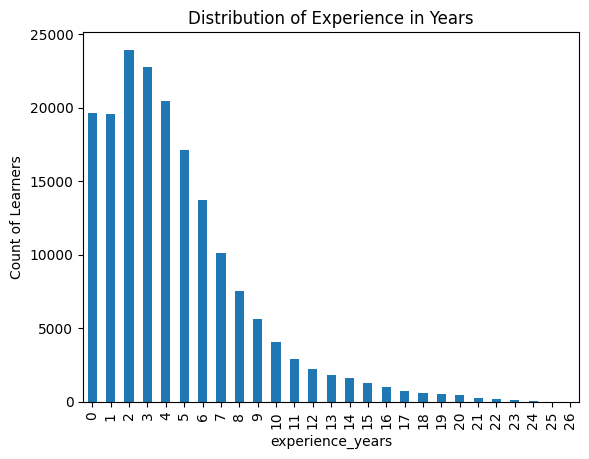

In [92]:
df_new['experience_years'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Experience in Years')
plt.ylabel('Count of Learners')
plt.show()



1. Highest number of learners falls under 0–2 years of experience (64,615 combined), indicating strong participation from fresh graduates or early-career professionals.
2. The 3–6 years of experience window consists of  72,604 learners, representing individuals likely looking to transition into mid-level roles or upscale their skills for growth.
3. There are 8,788 learners with 10–15 years of experience, indicating interest from seasoned professionals seeking specialization or career shifts.


        Learner count progressively decreases as years of experience increase, showing fewer participants in senior-level roles.
  The 16+ years of experience group is a smaller but significant cohort, with 4,118 learners, often C-suite or leadership professionals aiming to update skills or mentor others.



In [93]:
df_new = df_new.sort_values(by=['email_hash', 'ctc_updated_year','ctc'])
df_new['promotion_status'] = df_new.groupby('email_hash')['ctc'].diff().gt(0).fillna(False).astype('int')
df_new

,company_hash,email_hash,ctc,ctc_updated_year,job_category,joining_year,experience_years,promotion_status
84638,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,3500000,2019,Backend Engineer,2012,7,0
506,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000,2020,Backend Engineer,2013,7,0
51568,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,2021,Product Development,2021,0,0
53844,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000,2021,Product Development,2004,17,0
138229,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,3400000,2018,Unknown,2009,9,0
...,...,...,...,...,...,...,...,...
39637,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,3529999,2019,Quality Assurance and Testing,2004,15,0
185749,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,1600000,2018,Unknown,2015,3,0
148315,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,900000,2019,IT and Cyber Security,2014,5,0
14106,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,700000,2020,Product Development,2020,0,0


In [94]:
df_new.groupby('email_hash')['promotion_status'].max().value_counts()

,count
promotion_status,
0,145640
1,7803


**Approximately 95.2% (145,641 learners) have not received a promotion, while 4.8% (7,802 learners) have achieved one — indicating that a small but notable portion of Scaler learners experience career advancement through the program.**